In [1]:
#we will be exploring FAANG stocks from 2012-2020. Looking at basic graphs.

In [2]:
#imports
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.pyplot import figure

In [3]:
#importing databases of FAANG stocks
fb_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/FB/FB.csv')
amzn_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AMZN/AMZN.csv')
aapl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AAPL/AAPL.csv')
nflx_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/NFLX/NFLX.csv')
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv')

In [4]:
print(fb_data.info(),fb_data.isnull().sum())
print(amzn_data.info(),amzn_data.isnull().sum())
print(aapl_data.info(),aapl_data.isnull().sum())
print(nflx_data.info(),nflx_data.isnull().sum())
print(googl_data.info(),googl_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2068 non-null   object 
 1   Open       2068 non-null   float64
 2   High       2068 non-null   float64
 3   Low        2068 non-null   float64
 4   Close      2068 non-null   float64
 5   Adj Close  2068 non-null   float64
 6   Volume     2068 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.2+ KB
None Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5846 non-null   object 
 1   Open       5846 non-null   float64
 2   High       5846 non-null   float64
 3   Low        5846 non-null   float64
 

In [5]:
#setting data paramters to 2012-05-18 -- 2020-08-01 as they are common to all dataframes
googl_data = googl_data[(googl_data['Date']>='2012-05-18') & (googl_data['Date']<= '2020-08-01')]
fb_data = fb_data[(fb_data['Date']>='2012-05-18') & (fb_data['Date']<= '2020-08-01')]
amzn_data = amzn_data[(amzn_data['Date']>='2012-05-18') & (amzn_data['Date']<= '2020-08-01')]
aapl_data = aapl_data[(aapl_data['Date']>='2012-05-18') & (aapl_data['Date']<= '2020-08-01')]
nflx_data = nflx_data[(nflx_data['Date']>='2012-05-18') & (nflx_data['Date']<= '2020-08-01')]

In [6]:
#creating dataframes of the data to be used and renaming
googl_data_filtered = googl_data[['Date','Adj Close']]
googl_data_filtered.columns = ['Date','Google Adj Close']
fb_data_filtered = fb_data[['Date','Adj Close']]
fb_data_filtered.columns = ['Date','FB Adj Close']
amzn_data_filtered = amzn_data[['Date','Adj Close']]
amzn_data_filtered.columns = ['Date','Amzn Adj Close']
aapl_data_filtered = aapl_data[['Date','Adj Close']]
aapl_data_filtered.columns = ['Date','Aapl Adj Close']
nflx_data_filtered = nflx_data[['Date','Adj Close']]
nflx_data_filtered.columns = ['Date','Nflx Adj Close']

In [7]:
#merging data frames and setting index
df1 = googl_data_filtered.merge(fb_data_filtered,on='Date',how='inner')
df2 = df1.merge(amzn_data_filtered,on='Date',how='inner')
df3 = df2.merge(aapl_data_filtered,on='Date',how='inner')
df = df3.merge(nflx_data_filtered,on='Date',how='inner')
df.set_index('Date',inplace=True)
print(df.head())
print(df.shape)

            Google Adj Close  FB Adj Close  Amzn Adj Close  Aapl Adj Close  \
Date                                                                         
2012-05-18        300.500488     38.230000      213.850006       65.592659   
2012-05-21        307.362366     34.029999      218.110001       69.414101   
2012-05-22        300.700714     31.000000      215.330002       68.881065   
2012-05-23        305.035034     32.000000      217.279999       70.561768   
2012-05-24        302.132141     33.029999      215.240005       69.913734   

            Nflx Adj Close  
Date                        
2012-05-18        9.994286  
2012-05-21       10.248571  
2012-05-22        9.672857  
2012-05-23       10.272857  
2012-05-24       10.038571  
(2064, 5)


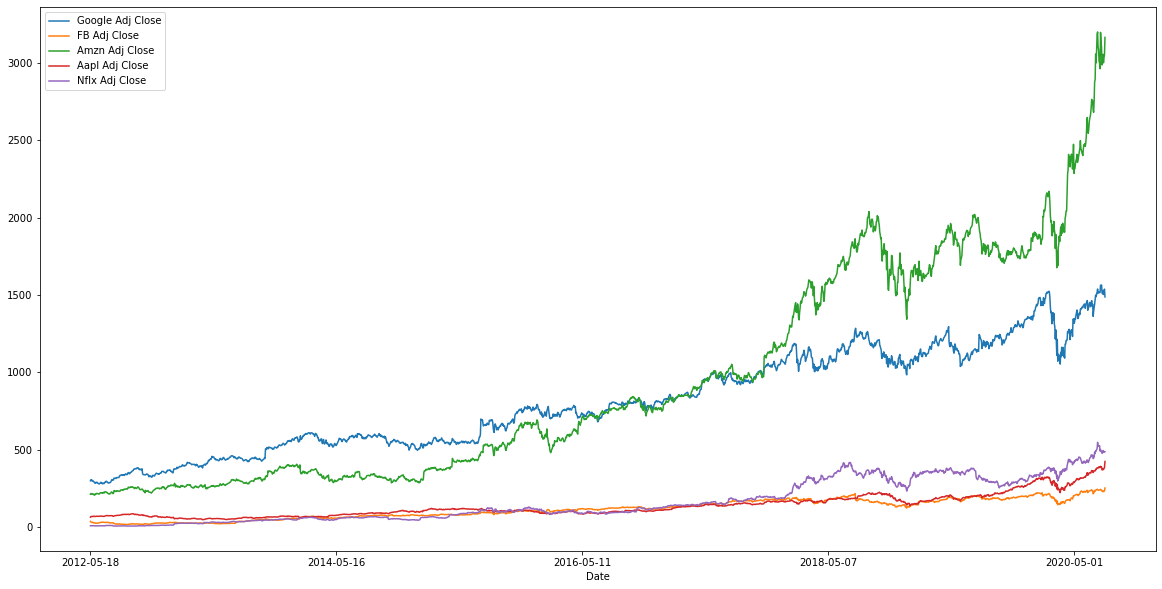

In [8]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df.plot(ax=ax)

In [9]:
#next steps: simple moving avg, pandas rollingmean and std,plot them,compare raw vs rolling various days,momentum stock

In [10]:
#setting up dataframes with columns names but does NOT reflect the data. Only used for plot legend.
df_rolling = df.copy(deep=False)
df_std = df.copy(deep=False)
df_exponential_rolling = df.copy(deep=False)
df_rolling.columns = [['Google Adj Close RL','FB Adj Close RL','Amzn Adj Close RL','Aapl Adj Close RL','Nflx Adj Close RL']]
df_std.columns = [['Google Adj Close std','FB Adj Close std','Amzn Adj Close std','Aapl Adj Close std','Nflx Adj Close std']]
df_exponential_rolling.columns = [['Googl Adj Close EXP','FB Adj Close EXP','Amzn Adj Close EXP','Aapl Adj Close EXP','Nflx Adj Close EXP']]

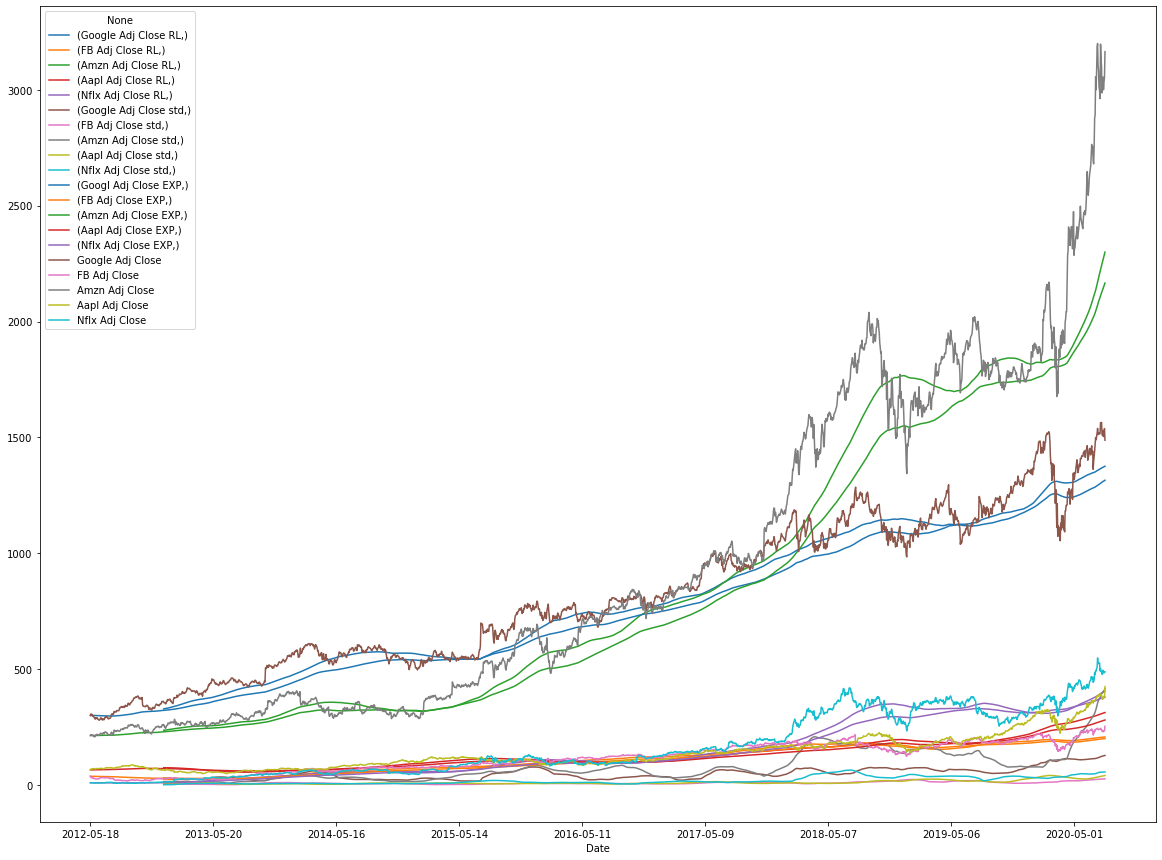

In [11]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df_rolling.rolling(150).mean().plot(ax=ax)
df_std.rolling(150).std().plot(ax=ax)
df_exponential_rolling.ewm(150,adjust=False).mean().plot(ax=ax)
df.plot(ax=ax)

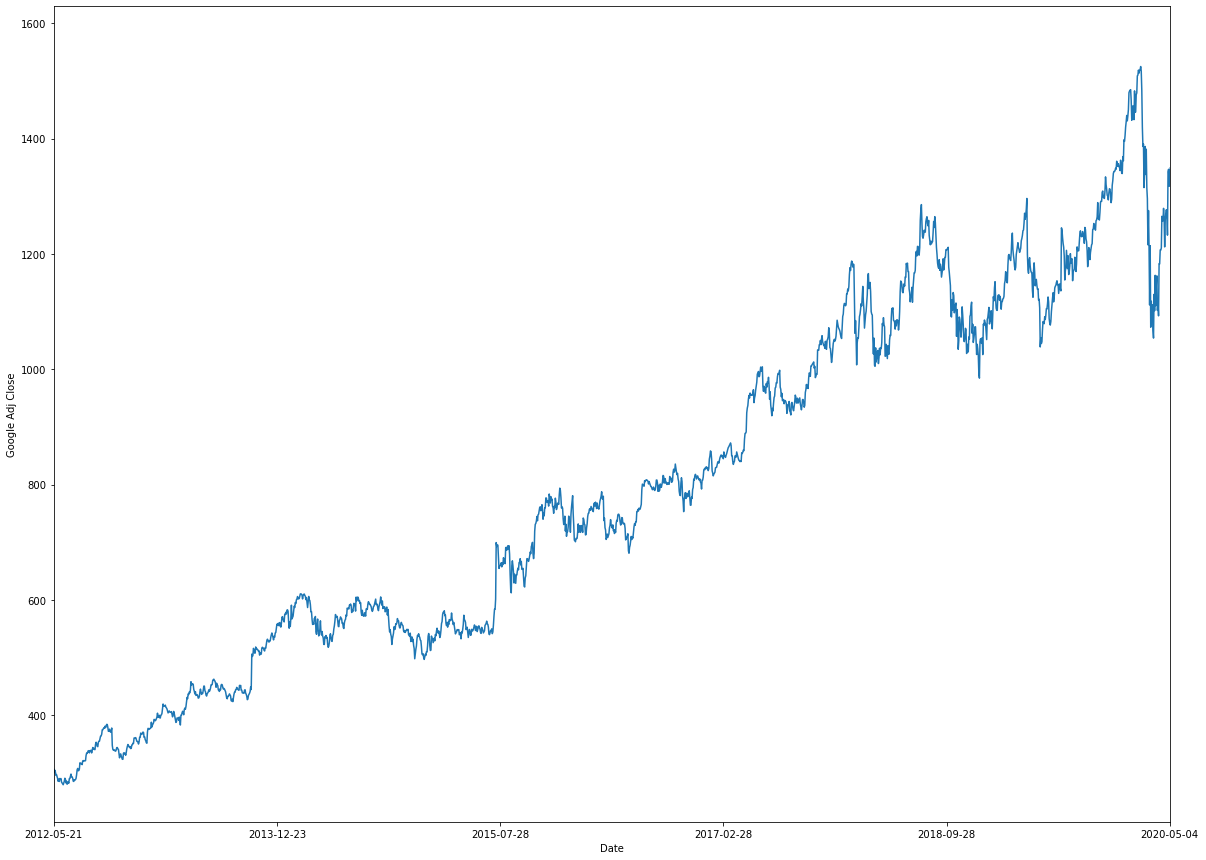

In [31]:
#df = df.reset_index()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
sns.lineplot(data=df,x='Date',y='Google Adj Close',ax=ax)
ax.set_xlim(1,9)
ax.set_xticks(range(1,2201,400))
plt.show()